In [1]:
import nest
import pylab

In [2]:
def build_network(dt):

    nest.ResetKernel()
    nest.SetKernelStatus({"local_num_threads": 1, "resolution": dt})

    neuron = nest.Create('iaf_psc_alpha')
    nest.SetStatus(neuron, "I_e", 376.0)

    vm = nest.Create('voltmeter')
    nest.SetStatus(vm, "withtime", True)

    sd = nest.Create('spike_detector')

    nest.Connect(vm, neuron)
    nest.Connect(neuron, sd)

    return vm, sd

In [3]:
for dt in [0.1, 0.5, 1.0]:
    print("Running simulation with dt=%.2f" % dt)
    vm, sd = build_network(dt)

    nest.Simulate(1000.0)

Running simulation with dt=0.10
Running simulation with dt=0.50
Running simulation with dt=1.00


In [4]:
potentials = nest.GetStatus(vm, "events")[0]["V_m"]
times = nest.GetStatus(vm, "events")[0]["times"]

  Number of spikes: 16


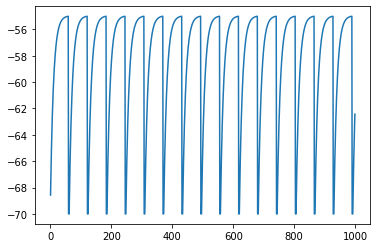

In [5]:
pylab.plot(times, potentials, label="dt=%.2f" % dt)
print("  Number of spikes: {0}".format(nest.GetStatus(sd, "n_events")[0]))

No handles with labels found to put in legend.


Text(0, 0.5, 'V_m (mV)')

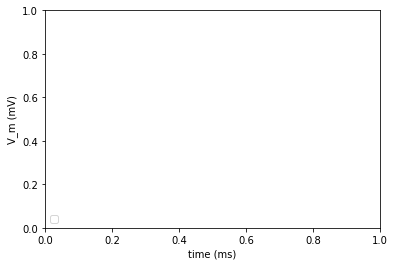

In [6]:
pylab.legend(loc=3)
pylab.xlabel("time (ms)")
pylab.ylabel("V_m (mV)")